In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from tensorflow import keras 
import random
import scipy
random.seed(1234)

/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/users/t_wand01/.local/lib/python3.7/site-packages/tensorflow/

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [3]:
def f(x):
    return(2 + x[:,1]**3. -2* x[:,2]**2 + np.exp(np.abs(x[:,6])) + 3*x[:,8]*x[:,9])

x = np.random.normal(size = (1000,10))
y = f(x) + 0.5*np.random.normal(size = x.shape[0])
xtest = np.random.normal(size = (1000,10))
ytest = f(xtest) + 0.5*np.random.normal(size = xtest.shape[0])

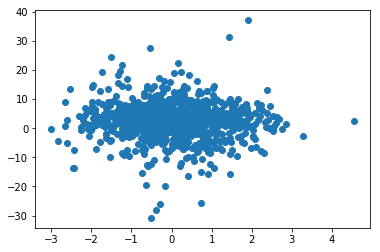

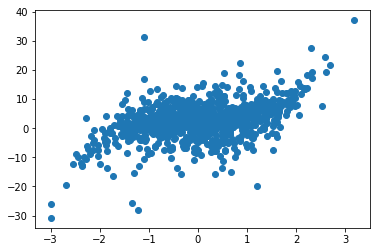

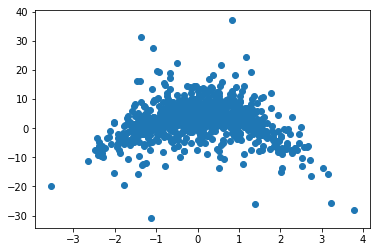

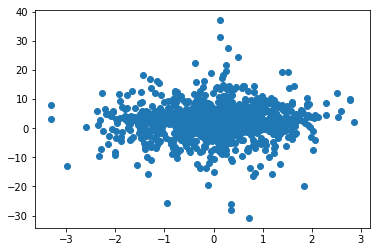

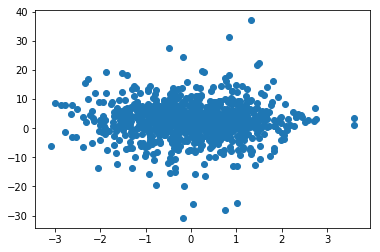

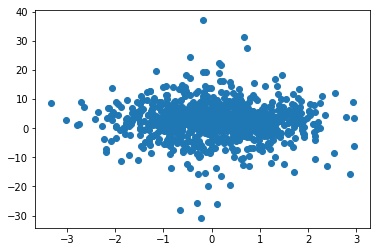

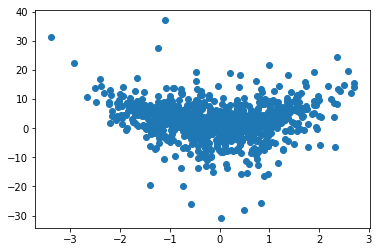

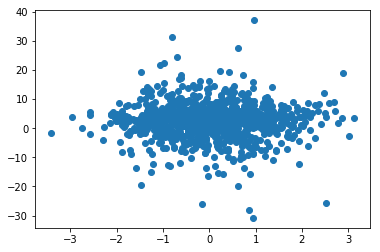

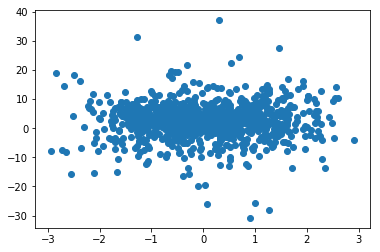

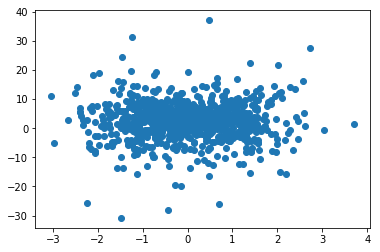

In [4]:
for i in range(x.shape[1]):
    plt.scatter(x[:,i], y)
    plt.show()

In [5]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,273
Trainable params: 166,273
Non-trainable params: 0
________________________________________________________________

In [6]:
NN_model.fit(x, y, epochs=500, batch_size=32, validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/500
 32/800 [>.............................] - ETA: 1s - loss: 4.7973 - mean_absolute_error: 4.7973

2021-11-18 11:02:42.878015: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-11-18 11:02:42.900907: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3299990000 Hz
2021-11-18 11:02:42.901566: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2480140 executing computations on platform Host. Devices:
2021-11-18 11:02:42.901583: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-11-18 11:02:42.932470: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or se

800/800 [==============================] - 0s 160us/sample - loss: 4.3946 - mean_absolute_error: 4.3946 - val_loss: 3.8199 - val_mean_absolute_error: 3.8199
Epoch 2/500
800/800 [==============================] - 0s 48us/sample - loss: 3.6930 - mean_absolute_error: 3.6930 - val_loss: 3.4138 - val_mean_absolute_error: 3.4138
Epoch 3/500
800/800 [==============================] - 0s 50us/sample - loss: 3.2300 - mean_absolute_error: 3.2300 - val_loss: 2.9682 - val_mean_absolute_error: 2.9682
Epoch 4/500
800/800 [==============================] - 0s 46us/sample - loss: 2.6439 - mean_absolute_error: 2.6439 - val_loss: 2.4502 - val_mean_absolute_error: 2.4502
Epoch 5/500
800/800 [==============================] - 0s 44us/sample - loss: 2.3270 - mean_absolute_error: 2.3270 - val_loss: 2.0628 - val_mean_absolute_error: 2.0628
Epoch 6/500
800/800 [==============================] - 0s 43us/sample - loss: 1.9872 - mean_absolute_error: 1.9872 - val_loss: 1.9281 - val_mean_absolute_error: 1.9281
Epo

800/800 [==============================] - 0s 39us/sample - loss: 0.3989 - mean_absolute_error: 0.3989 - val_loss: 0.9381 - val_mean_absolute_error: 0.9381
Epoch 50/500
800/800 [==============================] - 0s 38us/sample - loss: 0.4095 - mean_absolute_error: 0.4095 - val_loss: 0.9187 - val_mean_absolute_error: 0.9187
Epoch 51/500
800/800 [==============================] - 0s 38us/sample - loss: 0.3735 - mean_absolute_error: 0.3735 - val_loss: 0.9564 - val_mean_absolute_error: 0.9564
Epoch 52/500
800/800 [==============================] - 0s 38us/sample - loss: 0.3444 - mean_absolute_error: 0.3444 - val_loss: 0.9468 - val_mean_absolute_error: 0.9468
Epoch 53/500
800/800 [==============================] - 0s 38us/sample - loss: 0.3358 - mean_absolute_error: 0.3358 - val_loss: 0.9318 - val_mean_absolute_error: 0.9318
Epoch 54/500
800/800 [==============================] - 0s 39us/sample - loss: 0.3494 - mean_absolute_error: 0.3494 - val_loss: 0.9781 - val_mean_absolute_error: 0.9781

800/800 [==============================] - 0s 37us/sample - loss: 0.2791 - mean_absolute_error: 0.2791 - val_loss: 1.0224 - val_mean_absolute_error: 1.0224
Epoch 98/500
800/800 [==============================] - 0s 37us/sample - loss: 0.3083 - mean_absolute_error: 0.3083 - val_loss: 0.9915 - val_mean_absolute_error: 0.9915
Epoch 99/500
800/800 [==============================] - 0s 38us/sample - loss: 0.3255 - mean_absolute_error: 0.3255 - val_loss: 0.9985 - val_mean_absolute_error: 0.9985
Epoch 100/500
800/800 [==============================] - 0s 38us/sample - loss: 0.2910 - mean_absolute_error: 0.2910 - val_loss: 0.9462 - val_mean_absolute_error: 0.9462
Epoch 101/500
800/800 [==============================] - 0s 36us/sample - loss: 0.3083 - mean_absolute_error: 0.3083 - val_loss: 1.0164 - val_mean_absolute_error: 1.0164
Epoch 102/500
800/800 [==============================] - 0s 38us/sample - loss: 0.3169 - mean_absolute_error: 0.3169 - val_loss: 0.9520 - val_mean_absolute_error: 0.9

800/800 [==============================] - 0s 37us/sample - loss: 0.2506 - mean_absolute_error: 0.2506 - val_loss: 1.0137 - val_mean_absolute_error: 1.0137
Epoch 146/500
800/800 [==============================] - 0s 38us/sample - loss: 0.2521 - mean_absolute_error: 0.2521 - val_loss: 1.0443 - val_mean_absolute_error: 1.0443
Epoch 147/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2762 - mean_absolute_error: 0.2762 - val_loss: 0.9716 - val_mean_absolute_error: 0.9716
Epoch 148/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2500 - mean_absolute_error: 0.2500 - val_loss: 0.9745 - val_mean_absolute_error: 0.9745
Epoch 149/500
800/800 [==============================] - 0s 37us/sample - loss: 0.3007 - mean_absolute_error: 0.3007 - val_loss: 0.9853 - val_mean_absolute_error: 0.9853
Epoch 150/500
800/800 [==============================] - 0s 38us/sample - loss: 0.2426 - mean_absolute_error: 0.2426 - val_loss: 0.9792 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 36us/sample - loss: 0.2202 - mean_absolute_error: 0.2202 - val_loss: 1.0134 - val_mean_absolute_error: 1.0134
Epoch 194/500
800/800 [==============================] - 0s 36us/sample - loss: 0.2392 - mean_absolute_error: 0.2392 - val_loss: 1.0184 - val_mean_absolute_error: 1.0184
Epoch 195/500
800/800 [==============================] - 0s 39us/sample - loss: 0.2609 - mean_absolute_error: 0.2609 - val_loss: 0.9871 - val_mean_absolute_error: 0.9871
Epoch 196/500
800/800 [==============================] - 0s 39us/sample - loss: 0.2510 - mean_absolute_error: 0.2510 - val_loss: 0.9406 - val_mean_absolute_error: 0.9406
Epoch 197/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2414 - mean_absolute_error: 0.2414 - val_loss: 0.9613 - val_mean_absolute_error: 0.9613
Epoch 198/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2394 - mean_absolute_error: 0.2394 - val_loss: 0.9997 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 37us/sample - loss: 0.2077 - mean_absolute_error: 0.2077 - val_loss: 1.0183 - val_mean_absolute_error: 1.0183
Epoch 242/500
800/800 [==============================] - 0s 38us/sample - loss: 0.2411 - mean_absolute_error: 0.2411 - val_loss: 0.9995 - val_mean_absolute_error: 0.9995
Epoch 243/500
800/800 [==============================] - 0s 36us/sample - loss: 0.2169 - mean_absolute_error: 0.2169 - val_loss: 1.0137 - val_mean_absolute_error: 1.0137
Epoch 244/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2112 - mean_absolute_error: 0.2112 - val_loss: 0.9736 - val_mean_absolute_error: 0.9736
Epoch 245/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2453 - mean_absolute_error: 0.2453 - val_loss: 0.9459 - val_mean_absolute_error: 0.9459
Epoch 246/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2004 - mean_absolute_error: 0.2004 - val_loss: 0.9681 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 37us/sample - loss: 0.1779 - mean_absolute_error: 0.1779 - val_loss: 1.0556 - val_mean_absolute_error: 1.0556
Epoch 290/500
800/800 [==============================] - 0s 38us/sample - loss: 0.2549 - mean_absolute_error: 0.2549 - val_loss: 0.9861 - val_mean_absolute_error: 0.9861
Epoch 291/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2375 - mean_absolute_error: 0.2375 - val_loss: 1.0026 - val_mean_absolute_error: 1.0026
Epoch 292/500
800/800 [==============================] - 0s 38us/sample - loss: 0.1955 - mean_absolute_error: 0.1955 - val_loss: 0.9745 - val_mean_absolute_error: 0.9745
Epoch 293/500
800/800 [==============================] - 0s 37us/sample - loss: 0.2628 - mean_absolute_error: 0.2628 - val_loss: 1.0699 - val_mean_absolute_error: 1.0699
Epoch 294/500
800/800 [==============================] - 0s 36us/sample - loss: 0.1913 - mean_absolute_error: 0.1913 - val_loss: 0.9848 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 38us/sample - loss: 0.1731 - mean_absolute_error: 0.1731 - val_loss: 1.0010 - val_mean_absolute_error: 1.0010
Epoch 338/500
800/800 [==============================] - 0s 36us/sample - loss: 0.1666 - mean_absolute_error: 0.1666 - val_loss: 1.0036 - val_mean_absolute_error: 1.0036
Epoch 339/500
800/800 [==============================] - 0s 35us/sample - loss: 0.1657 - mean_absolute_error: 0.1657 - val_loss: 1.0116 - val_mean_absolute_error: 1.0116
Epoch 340/500
800/800 [==============================] - 0s 37us/sample - loss: 0.1896 - mean_absolute_error: 0.1896 - val_loss: 0.9880 - val_mean_absolute_error: 0.9880
Epoch 341/500
800/800 [==============================] - 0s 37us/sample - loss: 0.1848 - mean_absolute_error: 0.1848 - val_loss: 1.0276 - val_mean_absolute_error: 1.0276
Epoch 342/500
800/800 [==============================] - 0s 37us/sample - loss: 0.1854 - mean_absolute_error: 0.1854 - val_loss: 0.9795 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 36us/sample - loss: 0.1794 - mean_absolute_error: 0.1794 - val_loss: 0.9700 - val_mean_absolute_error: 0.9700
Epoch 386/500
800/800 [==============================] - 0s 39us/sample - loss: 0.2166 - mean_absolute_error: 0.2166 - val_loss: 0.9680 - val_mean_absolute_error: 0.9680
Epoch 387/500
800/800 [==============================] - 0s 38us/sample - loss: 0.1842 - mean_absolute_error: 0.1842 - val_loss: 0.9983 - val_mean_absolute_error: 0.9983
Epoch 388/500
800/800 [==============================] - 0s 38us/sample - loss: 0.1550 - mean_absolute_error: 0.1550 - val_loss: 0.9842 - val_mean_absolute_error: 0.9842
Epoch 389/500
800/800 [==============================] - 0s 37us/sample - loss: 0.1618 - mean_absolute_error: 0.1618 - val_loss: 1.0266 - val_mean_absolute_error: 1.0266
Epoch 390/500
800/800 [==============================] - 0s 36us/sample - loss: 0.1681 - mean_absolute_error: 0.1681 - val_loss: 0.9953 - val_mean_absolute_error: 0

800/800 [==============================] - 0s 36us/sample - loss: 0.1660 - mean_absolute_error: 0.1660 - val_loss: 0.9678 - val_mean_absolute_error: 0.9678
Epoch 434/500
800/800 [==============================] - 0s 39us/sample - loss: 0.1743 - mean_absolute_error: 0.1743 - val_loss: 0.9973 - val_mean_absolute_error: 0.9973
Epoch 435/500
800/800 [==============================] - 0s 38us/sample - loss: 0.1463 - mean_absolute_error: 0.1463 - val_loss: 1.0212 - val_mean_absolute_error: 1.0212
Epoch 436/500
800/800 [==============================] - 0s 39us/sample - loss: 0.1609 - mean_absolute_error: 0.1609 - val_loss: 0.9941 - val_mean_absolute_error: 0.9941
Epoch 437/500
800/800 [==============================] - 0s 37us/sample - loss: 0.1638 - mean_absolute_error: 0.1638 - val_loss: 1.0138 - val_mean_absolute_error: 1.0138
Epoch 438/500
800/800 [==============================] - 0s 35us/sample - loss: 0.1514 - mean_absolute_error: 0.1514 - val_loss: 1.0095 - val_mean_absolute_error: 1

800/800 [==============================] - 0s 46us/sample - loss: 0.1644 - mean_absolute_error: 0.1644 - val_loss: 0.9893 - val_mean_absolute_error: 0.9893
Epoch 482/500
800/800 [==============================] - 0s 37us/sample - loss: 0.1758 - mean_absolute_error: 0.1758 - val_loss: 1.0116 - val_mean_absolute_error: 1.0116
Epoch 483/500
800/800 [==============================] - 0s 36us/sample - loss: 0.1703 - mean_absolute_error: 0.1703 - val_loss: 0.9693 - val_mean_absolute_error: 0.9693
Epoch 484/500
800/800 [==============================] - 0s 38us/sample - loss: 0.1507 - mean_absolute_error: 0.1507 - val_loss: 1.0257 - val_mean_absolute_error: 1.0257
Epoch 485/500
800/800 [==============================] - 0s 41us/sample - loss: 0.1570 - mean_absolute_error: 0.1570 - val_loss: 1.0315 - val_mean_absolute_error: 1.0315
Epoch 486/500
800/800 [==============================] - 0s 41us/sample - loss: 0.2004 - mean_absolute_error: 0.2004 - val_loss: 0.9891 - val_mean_absolute_error: 0

In [7]:
yhat = NN_model.predict(xtest[0:50,:])
yhat = yhat.ravel()
print(yhat.ndim,yhat)
print(yhat.reshape(1,-1))
print(ytest[0:50])
print(ytest.shape)
print()

1 [  1.1720104    6.444806    -0.3535035   11.912593    -0.15534472
  -4.4802217   -5.192876     3.2514198   -4.7919064   -0.18944708
  -1.2482743    1.882402     4.801709    10.494382     0.99571323
   4.6855145   -2.4739082    2.2034128    4.192074     1.6380017
   8.914334     1.1909827    1.9715691    2.9513805   -0.71198773
  -3.8802176  -19.606201     8.050676    -0.02896003   0.18996616
  -1.7044344    5.867352     0.37161434   1.1831818   -0.5177746
   2.765565     6.5597353   -5.392694     9.642827    -2.241764
  -2.0036607    4.9254575   -2.2959437    6.848343     3.6508133
   3.4167662    4.282102    -2.1330516   11.486122     0.06730683]
[[  1.1720104    6.444806    -0.3535035   11.912593    -0.15534472
   -4.4802217   -5.192876     3.2514198   -4.7919064   -0.18944708
   -1.2482743    1.882402     4.801709    10.494382     0.99571323
    4.6855145   -2.4739082    2.2034128    4.192074     1.6380017
    8.914334     1.1909827    1.9715691    2.9513805   -0.71198773
   -3.88

In [8]:
yhat = NN_model.predict(xtest)
yhat = yhat.ravel() # else problem with dimensions

print(np.mean((yhat - ytest)**2.))

print(np.max(yhat), np.min(yhat))
print(np.max(ytest), np.min(ytest))

2.6953707392829593
26.618837 -21.194834
39.6041813749828 -34.120170171857986


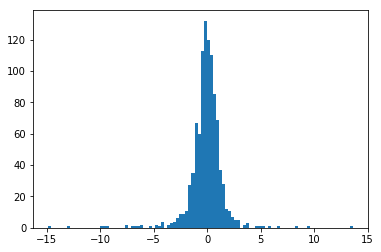

In [9]:
plt.hist((yhat - ytest), bins = 100)
plt.show()

## DGLs

Hypothese: wenn wir 3 Neuronale Netze im Lorenzsystem von
(x_1, x_2, x_3) -> d/dt (x_1, x_2, x_3) machen,
sieht man mit SHAP die Interaktionen der nichtlinearen Terme

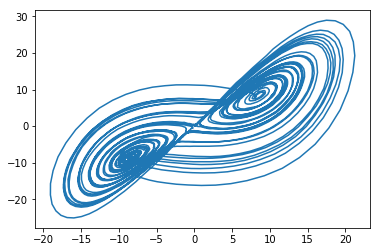

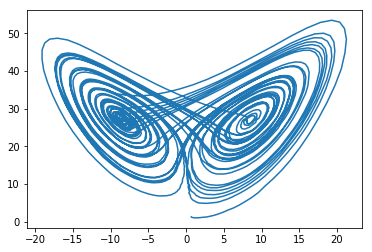

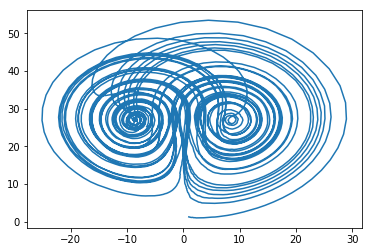

In [10]:
X = np.loadtxt("Lorenz5000_dt0.01.txt")

plt.plot(X[:,0], X[:,1])
plt.show()

plt.plot(X[:,0], X[:,2])
plt.show()

plt.plot(X[:,1], X[:,2])
plt.show()

In [11]:
print(X[0:(X.shape[0]-1),0])
print(X[1:,0])

[ 0.68740279  0.73084856  0.75877885 ... -6.88104749 -6.84861157
 -6.7888538 ]
[ 0.73084856  0.75877885  0.83716927 ... -6.84861157 -6.7888538
 -6.72797166]


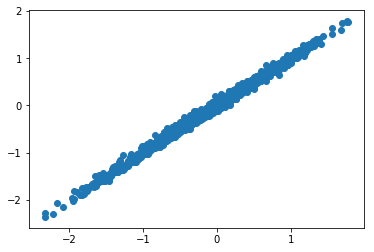

In [12]:
# Derivatives
dX0dt = np.gradient(X[:,0])
dX1dt = np.gradient(X[:,1])
dX2dt = np.gradient(X[:,2])


plt.scatter(dX0dt[1:],  X[1:,0] - X[0:(X.shape[0]-1),0])
plt.show() # looks good

### X0

In [13]:
NN0 = Sequential()

# The Input Layer :
NN0.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN0.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN0.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN0.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

In [14]:
X0_train, X0_test, y0_train, y0_test = sklearn.model_selection.train_test_split(X, dX0dt, test_size=0.33,
                                                                                random_state=42)

In [15]:
NN0.fit(X0_train, y0_train, epochs=500, batch_size=32, validation_split = 0.5)

Train on 1675 samples, validate on 1675 samples
Epoch 1/500
1675/1675 [==============================] - 0s 120us/sample - loss: 0.1257 - mean_absolute_error: 0.1257 - val_loss: 0.0661 - val_mean_absolute_error: 0.0661
Epoch 2/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0489 - mean_absolute_error: 0.0489 - val_loss: 0.0407 - val_mean_absolute_error: 0.0407
Epoch 3/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0359 - mean_absolute_error: 0.0359 - val_loss: 0.0392 - val_mean_absolute_error: 0.0392
Epoch 4/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0317 - mean_absolute_error: 0.0317 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585
Epoch 5/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0415 - mean_absolute_error: 0.0415 - val_loss: 0.0372 - val_mean_absolute_error: 0.0372
Epoch 6/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0304 - mean_absolut

Epoch 49/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 50/500
1675/1675 [==============================] - 0s 54us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0356 - val_mean_absolute_error: 0.0356
Epoch 51/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0254 - val_mean_absolute_error: 0.0254
Epoch 52/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298
Epoch 53/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0266 - mean_absolute_error: 0.0266 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 54/500
1675/1675 [==============================] - 0s 53us/sample - loss: 0.0266 - mean_absolute_error: 0.0266 - val_loss: 0.0225 - val_me

Epoch 97/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 98/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.0221 - val_mean_absolute_error: 0.0221
Epoch 99/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 100/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0224 - mean_absolute_error: 0.0224 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272
Epoch 101/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0301 - val_mean_absolute_error: 0.0301
Epoch 102/500
1675/1675 [==============================] - 0s 54us/sample - loss: 0.0245 - mean_absolute_error: 0.0245 - val_loss: 0.0241 - val

Epoch 145/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256
Epoch 146/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0228 - val_mean_absolute_error: 0.0228
Epoch 147/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0222 - mean_absolute_error: 0.0222 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218
Epoch 148/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0218 - mean_absolute_error: 0.0218 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272
Epoch 149/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 150/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.0221 - 

1675/1675 [==============================] - 0s 58us/sample - loss: 0.0201 - mean_absolute_error: 0.0201 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236
Epoch 193/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0215 - mean_absolute_error: 0.0215 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272
Epoch 194/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0220 - mean_absolute_error: 0.0220 - val_loss: 0.0272 - val_mean_absolute_error: 0.0272
Epoch 195/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0231 - mean_absolute_error: 0.0231 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260
Epoch 196/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0248 - val_mean_absolute_error: 0.0248
Epoch 197/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0217 - mean_absolute_error: 0.0217 - val_loss: 0.0216 - val_mean_absol

Epoch 240/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0205 - mean_absolute_error: 0.0205 - val_loss: 0.0219 - val_mean_absolute_error: 0.0219
Epoch 241/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0207 - mean_absolute_error: 0.0207 - val_loss: 0.0213 - val_mean_absolute_error: 0.0213
Epoch 242/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0213 - mean_absolute_error: 0.0213 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 243/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0216 - mean_absolute_error: 0.0216 - val_loss: 0.0282 - val_mean_absolute_error: 0.0282
Epoch 244/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0223 - mean_absolute_error: 0.0223 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 245/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0219 - mean_absolute_error: 0.0219 - val_loss: 0.0208 - 

1675/1675 [==============================] - 0s 59us/sample - loss: 0.0202 - mean_absolute_error: 0.0202 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266
Epoch 288/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0226 - mean_absolute_error: 0.0226 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215
Epoch 289/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0202 - mean_absolute_error: 0.0202 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206
Epoch 290/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0204 - mean_absolute_error: 0.0204 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 291/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0201 - mean_absolute_error: 0.0201 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 292/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0201 - mean_absolute_error: 0.0201 - val_loss: 0.0239 - val_mean_absol

Epoch 335/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0205 - mean_absolute_error: 0.0205 - val_loss: 0.0223 - val_mean_absolute_error: 0.0223
Epoch 336/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218
Epoch 337/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0200 - mean_absolute_error: 0.0200 - val_loss: 0.0218 - val_mean_absolute_error: 0.0218
Epoch 338/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0222 - mean_absolute_error: 0.0222 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261
Epoch 339/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0221 - val_mean_absolute_error: 0.0221
Epoch 340/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0205 - mean_absolute_error: 0.0205 - val_loss: 0.0227 - 

1675/1675 [==============================] - 0s 56us/sample - loss: 0.0194 - mean_absolute_error: 0.0194 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 383/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209
Epoch 384/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0202 - mean_absolute_error: 0.0202 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215
Epoch 385/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0209 - mean_absolute_error: 0.0209 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210
Epoch 386/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0195 - mean_absolute_error: 0.0195 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 387/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.0208 - val_mean_absol

Epoch 430/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0192 - mean_absolute_error: 0.0192 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206
Epoch 431/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0203 - mean_absolute_error: 0.0203 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224
Epoch 432/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0205 - mean_absolute_error: 0.0205 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210
Epoch 433/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0189 - mean_absolute_error: 0.0189 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 434/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0188 - mean_absolute_error: 0.0188 - val_loss: 0.0212 - val_mean_absolute_error: 0.0212
Epoch 435/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0205 - 

1675/1675 [==============================] - 0s 60us/sample - loss: 0.0191 - mean_absolute_error: 0.0191 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 478/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0203 - mean_absolute_error: 0.0203 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217
Epoch 479/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0233 - val_mean_absolute_error: 0.0233
Epoch 480/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0199 - mean_absolute_error: 0.0199 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241
Epoch 481/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0196 - mean_absolute_error: 0.0196 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 482/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0203 - mean_absolute_error: 0.0203 - val_loss: 0.0228 - val_mean_absol

In [16]:
y0hat = NN0.predict(X0_test)
y0hat = y0hat.ravel() # else problem with dimensions

print(np.mean((y0hat - y0_test)**2.))

0.0006653724996306513


### X1

In [17]:
NN1 = Sequential()

# The Input Layer :
NN1.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN1.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN1.summary()

X1_train, X1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(X, dX1dt, test_size=0.33,
                                                                                random_state=42)

NN1.fit(X1_train, y1_train, epochs=500, batch_size=32, validation_split = 0.5)
y1hat = NN1.predict(X1_test)
y1hat = y1hat.ravel() # else problem with dimensions


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0498 - mean_absolute_error: 0.0498 - val_loss: 0.0534 - val_mean_absolute_error: 0.0534
Epoch 43/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0521 - mean_absolute_error: 0.0521 - val_loss: 0.0981 - val_mean_absolute_error: 0.0981
Epoch 44/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0526 - mean_absolute_error: 0.0526 - val_loss: 0.0639 - val_mean_absolute_error: 0.0639
Epoch 45/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0538 - mean_absolute_error: 0.0538 - val_loss: 0.0450 - val_mean_absolute_error: 0.0450
Epoch 46/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0425 - mean_absolute_error: 0.0425 - val_loss: 0.0654 - val_mean_absolute_error: 0.0654
Epoch 47/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0527 - mean_absolute_error: 0.0527 - val_loss: 0.0480 - val_me

Epoch 90/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0362 - mean_absolute_error: 0.0362 - val_loss: 0.0434 - val_mean_absolute_error: 0.0434
Epoch 91/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0388 - mean_absolute_error: 0.0388 - val_loss: 0.0415 - val_mean_absolute_error: 0.0415
Epoch 92/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0360 - mean_absolute_error: 0.0360 - val_loss: 0.0345 - val_mean_absolute_error: 0.0345
Epoch 93/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0344 - mean_absolute_error: 0.0344 - val_loss: 0.0487 - val_mean_absolute_error: 0.0487
Epoch 94/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0416 - mean_absolute_error: 0.0416 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 95/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0439 - mean_absolute_error: 0.0439 - val_loss: 0.0364 - val_me

Epoch 138/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0319 - mean_absolute_error: 0.0319 - val_loss: 0.0615 - val_mean_absolute_error: 0.0615
Epoch 139/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0376 - mean_absolute_error: 0.0376 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 140/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0362 - mean_absolute_error: 0.0362 - val_loss: 0.0553 - val_mean_absolute_error: 0.0553
Epoch 141/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0362 - val_mean_absolute_error: 0.0362
Epoch 142/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0332 - mean_absolute_error: 0.0332 - val_loss: 0.0396 - val_mean_absolute_error: 0.0396
Epoch 143/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0303 - mean_absolute_error: 0.0303 - val_loss: 0.0388 - 

1675/1675 [==============================] - 0s 58us/sample - loss: 0.0321 - mean_absolute_error: 0.0321 - val_loss: 0.0279 - val_mean_absolute_error: 0.0279
Epoch 186/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0349 - val_mean_absolute_error: 0.0349
Epoch 187/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0366 - mean_absolute_error: 0.0366 - val_loss: 0.0380 - val_mean_absolute_error: 0.0380
Epoch 188/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 189/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0280 - mean_absolute_error: 0.0280 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 190/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0314 - mean_absolute_error: 0.0314 - val_loss: 0.0579 - val_mean_absol

Epoch 233/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0328 - mean_absolute_error: 0.0328 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 234/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0261 - val_mean_absolute_error: 0.0261
Epoch 235/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0285 - mean_absolute_error: 0.0285 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285
Epoch 236/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0309 - mean_absolute_error: 0.0309 - val_loss: 0.0374 - val_mean_absolute_error: 0.0374
Epoch 237/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0292 - mean_absolute_error: 0.0292 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 238/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0336 - 

1675/1675 [==============================] - 0s 56us/sample - loss: 0.0287 - mean_absolute_error: 0.0287 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355
Epoch 281/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0304 - val_mean_absolute_error: 0.0304
Epoch 282/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0339 - mean_absolute_error: 0.0339 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289
Epoch 283/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0285 - mean_absolute_error: 0.0285 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 284/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0280 - mean_absolute_error: 0.0280 - val_loss: 0.0358 - val_mean_absolute_error: 0.0358
Epoch 285/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0278 - mean_absolute_error: 0.0278 - val_loss: 0.0270 - val_mean_absol

Epoch 328/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0255 - mean_absolute_error: 0.0255 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 329/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0287 - mean_absolute_error: 0.0287 - val_loss: 0.0276 - val_mean_absolute_error: 0.0276
Epoch 330/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 331/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 332/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0270 - mean_absolute_error: 0.0270 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368
Epoch 333/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0276 - mean_absolute_error: 0.0276 - val_loss: 0.0254 - 

1675/1675 [==============================] - 0s 56us/sample - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 376/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0278 - mean_absolute_error: 0.0278 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259
Epoch 377/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0273 - val_mean_absolute_error: 0.0273
Epoch 378/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291
Epoch 379/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0275 - mean_absolute_error: 0.0275 - val_loss: 0.0421 - val_mean_absolute_error: 0.0421
Epoch 380/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0337 - val_mean_absol

Epoch 423/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0239 - val_mean_absolute_error: 0.0239
Epoch 424/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0269 - mean_absolute_error: 0.0269 - val_loss: 0.0319 - val_mean_absolute_error: 0.0319
Epoch 425/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0301 - mean_absolute_error: 0.0301 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266
Epoch 426/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0300 - mean_absolute_error: 0.0300 - val_loss: 0.0408 - val_mean_absolute_error: 0.0408
Epoch 427/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 428/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0271 - mean_absolute_error: 0.0271 - val_loss: 0.0381 - 

1675/1675 [==============================] - 0s 60us/sample - loss: 0.0316 - mean_absolute_error: 0.0316 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 471/500
1675/1675 [==============================] - 0s 62us/sample - loss: 0.0228 - mean_absolute_error: 0.0228 - val_loss: 0.0262 - val_mean_absolute_error: 0.0262
Epoch 472/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0252 - mean_absolute_error: 0.0252 - val_loss: 0.0386 - val_mean_absolute_error: 0.0386
Epoch 473/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0268 - val_mean_absolute_error: 0.0268
Epoch 474/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0327 - val_mean_absolute_error: 0.0327
Epoch 475/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0290 - mean_absolute_error: 0.0290 - val_loss: 0.0276 - val_mean_absol

In [18]:
print(np.mean((y1hat - y1_test)**2.))

0.0013005049352657256


## X2

In [31]:
NN2 = Sequential()

# The Input Layer :
NN2.add(Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN2.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN2.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN2.summary()

X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X, dX2dt, test_size=0.33,
                                                                                random_state=42)

NN2.fit(X2_train, y2_train, epochs=500, batch_size=32, validation_split = 0.5)
y2hat = NN2.predict(X1_test)
y2hat = y2hat.ravel() # else problem with dimensions


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 231,169
Trainable params: 231,169
Non-trainable params: 0
________________________________________________

Epoch 42/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0424 - mean_absolute_error: 0.0424 - val_loss: 0.0390 - val_mean_absolute_error: 0.0390
Epoch 43/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0394 - mean_absolute_error: 0.0394 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341
Epoch 44/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0336 - mean_absolute_error: 0.0336 - val_loss: 0.0339 - val_mean_absolute_error: 0.0339
Epoch 45/500
1675/1675 [==============================] - 0s 63us/sample - loss: 0.0379 - mean_absolute_error: 0.0379 - val_loss: 0.0583 - val_mean_absolute_error: 0.0583
Epoch 46/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0393 - mean_absolute_error: 0.0393 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331
Epoch 47/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0398 - mean_absolute_error: 0.0398 - val_loss: 0.0307 - val_me

Epoch 90/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0358 - mean_absolute_error: 0.0358 - val_loss: 0.0431 - val_mean_absolute_error: 0.0431
Epoch 91/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0326 - mean_absolute_error: 0.0326 - val_loss: 0.0489 - val_mean_absolute_error: 0.0489
Epoch 92/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0346 - mean_absolute_error: 0.0346 - val_loss: 0.0438 - val_mean_absolute_error: 0.0438
Epoch 93/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0338 - mean_absolute_error: 0.0338 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338
Epoch 94/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0385 - mean_absolute_error: 0.0385 - val_loss: 0.0269 - val_mean_absolute_error: 0.0269
Epoch 95/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0321 - mean_absolute_error: 0.0321 - val_loss: 0.0265 - val_me

Epoch 138/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0315 - mean_absolute_error: 0.0315 - val_loss: 0.0374 - val_mean_absolute_error: 0.0374
Epoch 139/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0358 - mean_absolute_error: 0.0358 - val_loss: 0.0515 - val_mean_absolute_error: 0.0515
Epoch 140/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0284 - mean_absolute_error: 0.0284 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265
Epoch 141/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0297 - mean_absolute_error: 0.0297 - val_loss: 0.0359 - val_mean_absolute_error: 0.0359
Epoch 142/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0314 - mean_absolute_error: 0.0314 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347
Epoch 143/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0476 - mean_absolute_error: 0.0476 - val_loss: 0.0351 - 

1675/1675 [==============================] - 0s 64us/sample - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368
Epoch 186/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277
Epoch 187/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0296 - mean_absolute_error: 0.0296 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 188/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0315 - val_mean_absolute_error: 0.0315
Epoch 189/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0303 - mean_absolute_error: 0.0303 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 190/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0361 - val_mean_absol

Epoch 233/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0302 - mean_absolute_error: 0.0302 - val_loss: 0.0403 - val_mean_absolute_error: 0.0403
Epoch 234/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0274 - mean_absolute_error: 0.0274 - val_loss: 0.0334 - val_mean_absolute_error: 0.0334
Epoch 235/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0323 - val_mean_absolute_error: 0.0323
Epoch 236/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278
Epoch 237/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0259 - mean_absolute_error: 0.0259 - val_loss: 0.0461 - val_mean_absolute_error: 0.0461
Epoch 238/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0232 - 

1675/1675 [==============================] - 0s 58us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247
Epoch 281/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0311 - val_mean_absolute_error: 0.0311
Epoch 282/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0268 - mean_absolute_error: 0.0268 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 283/500
1675/1675 [==============================] - 0s 59us/sample - loss: 0.0293 - mean_absolute_error: 0.0293 - val_loss: 0.0441 - val_mean_absolute_error: 0.0441
Epoch 284/500
1675/1675 [==============================] - 0s 64us/sample - loss: 0.0299 - mean_absolute_error: 0.0299 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 285/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0244 - mean_absolute_error: 0.0244 - val_loss: 0.0317 - val_mean_absol

Epoch 328/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242
Epoch 329/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0243 - mean_absolute_error: 0.0243 - val_loss: 0.0343 - val_mean_absolute_error: 0.0343
Epoch 330/500
1675/1675 [==============================] - 0s 55us/sample - loss: 0.0240 - mean_absolute_error: 0.0240 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257
Epoch 331/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0230 - mean_absolute_error: 0.0230 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309
Epoch 332/500
1675/1675 [==============================] - 0s 56us/sample - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0296 - val_mean_absolute_error: 0.0296
Epoch 333/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0256 - mean_absolute_error: 0.0256 - val_loss: 0.0302 - 

1675/1675 [==============================] - 0s 59us/sample - loss: 0.0279 - mean_absolute_error: 0.0279 - val_loss: 0.0406 - val_mean_absolute_error: 0.0406
Epoch 376/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0279 - mean_absolute_error: 0.0279 - val_loss: 0.0257 - val_mean_absolute_error: 0.0257
Epoch 377/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0252 - mean_absolute_error: 0.0252 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 378/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0280 - mean_absolute_error: 0.0280 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300
Epoch 379/500
1675/1675 [==============================] - 0s 61us/sample - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 380/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0256 - val_mean_absol

Epoch 423/500
1675/1675 [==============================] - 0s 66us/sample - loss: 0.0253 - mean_absolute_error: 0.0253 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 424/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357
Epoch 425/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 426/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0258 - mean_absolute_error: 0.0258 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 427/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0258 - val_mean_absolute_error: 0.0258
Epoch 428/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0260 - mean_absolute_error: 0.0260 - val_loss: 0.0226 - 

1675/1675 [==============================] - 0s 58us/sample - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256
Epoch 471/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0336 - val_mean_absolute_error: 0.0336
Epoch 472/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0265 - mean_absolute_error: 0.0265 - val_loss: 0.0220 - val_mean_absolute_error: 0.0220
Epoch 473/500
1675/1675 [==============================] - 0s 57us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 474/500
1675/1675 [==============================] - 0s 58us/sample - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0236 - val_mean_absolute_error: 0.0236
Epoch 475/500
1675/1675 [==============================] - 0s 60us/sample - loss: 0.0246 - mean_absolute_error: 0.0246 - val_loss: 0.0335 - val_mean_absol

In [32]:
print(np.mean((y1hat - y1_test)**2.))

0.0013005049352657256


## Evaluate Goodness-of-Fit

In [19]:
dt = 0.01
X0hat = np.zeros(X.shape[0])
X0hat[0] = X[0,0]
X1hat = np.zeros(X.shape[0])
X1hat[0] = X[0,1]
dx0 = NN0.predict(X)
dx1 = NN1.predict(X)

for i in range(len(X0hat)-1):
    X0hat[i+1] = X0hat[i] + dt*dx0[i] 
    X1hat[i+1] = X1hat[i] + dt*dx1[i] 
    

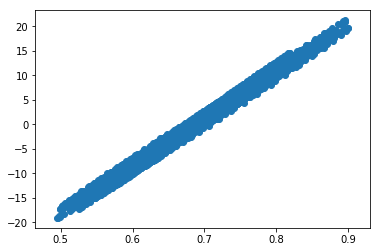

In [22]:
plt.scatter(X0hat, X[:,0])
plt.show()

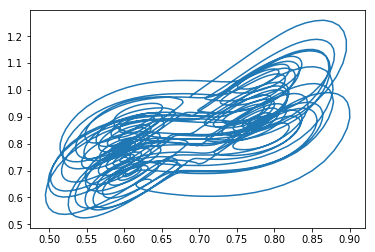

In [24]:
# probably not useful for forward-integration
plt.plot(X0hat, X1hat)
plt.show()

# Question: when exactly does the trajectory "jump"?

## Self-made SHAP code

In [28]:
def ChooseK(P):# P is integer of Feature number
    K =np.random.beta(0.2, 0.2,1)
    K = int(P*K+1)
    if K==P+1: # some degenerate cases
        K = K-1
    return(K)

def SwapFeatures(i,m,j,k):
    # take instance x_i, exchange k of its features randomly with the features of x_m including the jth Feature
    output = X[i,:].copy()
    
    if k == 1: # only change jth Feature
        output[j] = X[m,j].copy()
    
    else:
        Selection = np.random.choice(np.arange(X.shape[1]), size=k, replace=False)
        while (np.sum(Selection==j) ==0): # Make sure that j is included in selection
            Selection = np.random.choice(np.arange(X.shape[1]), size=k, replace=False)
        
        output[Selection] = X[m,Selection].copy()
    
    return(output)

def Compare(x_j, x_noj, Model):
    return(Model.predict(x_j.reshape(1, -1)) - Model.predict(x_noj.reshape(1, -1)))

def CalcShap(X,i,j,M,Model):
    # Calculate Shap values for DataSet X for ith instance and jth feature with M iterations for AI-Model "Model"
    M_iter = 0 # iteration index
    SHAPValues = np.empty(M)
    
    while M_iter<M:
        m = np.random.randint(X.shape[0]) # random instance to "mix" x_i with
    
        if m!=i:
            k = ChooseK(X.shape[1])
            
            x_dummy_noj = SwapFeatures(i,m,j,k) # sample from random other instance
            x_dummy_j = x_dummy_noj.copy()
            x_dummy_j[j] = X[i,j].copy()  # compare with j and without j
        
            SHAPValues[M_iter] = Compare(x_dummy_j,x_dummy_noj, Model=Model)
        
            M_iter = M_iter+1
            
    return(np.mean(SHAPValues))

def FeatureImportance(X,j,M1,M2,Model):
    # Calculate Feature Importancec over M1 instances for j'th Feature of Data Set X,
    #   compare each instance M2 times and evaluate via Model
    
    Output = np.empty(M1)
    
    for m1 in range(M1):
        i = np.random.randint(X.shape[0])
        Output[m1] = np.abs(CalcShap(X,i,j,M2,Model))
        
    return(np.mean(Output))

In [29]:
# For the entire Data Set and 0th component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN0)
    print(Jf, SHAP_Importance[Jf])

0 0.6563617700499017
1 0.7371162068000063
2 0.02165962864877656


Correctly shows that the Lorenz-Systems dx0/dt only depends on x0 and x1 :)

In [30]:
# For the entire Data Set and 1st component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN1)
    print(Jf, SHAP_Importance[Jf])

0 0.34383342986917126
1 0.25565385744608937
2 0.16492977252134586


For dx1/dt, the pseudo-SHAP correctly shows that all features contribute.

In [33]:
# For the entire Data Set and 2nd component
SHAP_Importance = np.empty(X.shape[1])
for Jf in range(X.shape[1]):
    SHAP_Importance[Jf] = FeatureImportance(X,Jf,1000,20,NN2)
    print(Jf, SHAP_Importance[Jf])

0 0.3914144277760759
1 0.3056985460182652
2 0.14591093320250512


Again, all features are in the same order of magnitude as it should be